

# ECON628-01 Project 1
### Shivprasad Gunjal


In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('whitegrid')

import plotly
plotly.offline.init_notebook_mode() 


# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
#%matplotlib notebook-----I would have loved to use this option but my PC is not bale to handle it.
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
pwd

u'C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal'

In [3]:
cd C:\Users\Shiv\Desktop\ECON628-01-spgunjal

C:\Users\Shiv\Desktop\ECON628-01-spgunjal


In [4]:
df = pd.read_stata("C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\Seminar_LTST.dta")

In [5]:
df.describe()

,CMIE,year,Incorporationyear,Mainproductservicegroupcode,Pincode,State_code,LT_Banks,TA,NGDP,RGDP,Aligned_const,Vote_share,Win_margin,Firndly_State,ST_BANK
count,9856.000000,9856.000000,9856.000000,9.856000e+03,9856.000000,9856.000000,5986.000000,8.339000e+03,9.597000e+03,9.470000e+03,9856.000000,9856.000000,9856.000000,9856.000000,5233.000000
mean,134011.193892,2012.000000,1985.301136,1.505449e+19,413813.691761,120.178267,4458.235282,2.024954e+04,6.499865e+06,4.182943e+06,0.706067,0.474972,0.133044,0.616376,2089.360558
std,128677.562500,2.000101,19.583756,6.204494e+18,188956.109375,9.779018,19129.314001,1.088131e+05,4.176737e+06,2.567344e+06,0.455585,0.079136,0.094833,0.486293,9608.974205
min,11.000000,2009.000000,1863.000000,1.020102e+18,110001.000000,111.000000,0.000000,1.000000e-01,1.005005e+05,8.750740e+04,0.000000,0.272657,0.000434,0.000000,0.000000
25%,43566.250000,2010.000000,1981.000000,1.003752e+19,364004.750000,112.000000,17.600000,3.747000e+02,3.375585e+06,2.082735e+06,0.000000,0.422002,0.054284,0.000000,50.800000
50%,87434.500000,2012.000000,1990.000000,1.705000e+19,400059.000000,116.500000,135.250000,1.557200e+03,5.215189e+06,3.341270e+06,1.000000,0.471152,0.127468,1.000000,235.700000
75%,134305.250000,2014.000000,1996.000000,2.103061e+19,560025.000000,123.000000,1083.225000,6.818350e+03,8.557505e+06,6.101914e+06,1.000000,0.525812,0.175590,1.000000,907.100000
max,424669.000000,2015.000000,2010.000000,2.200000e+19,845401.000000,145.000000,304286.800000,2.897724e+06,1.686695e+07,9.475498e+06,1.000000,0.757513,0.562210,1.000000,244400.700000


In [6]:
df.head(5)

,CMIE,year,Comp_name,Entitytype,Incorporationyear,Industrygroup,Mainproductservicegroup,Mainproductservicegroupcode,Ownershipgroup,Registeredofficeaddress,...,DST,TA,NGDP,RGDP,Constituency,Aligned_const,Vote_share,Win_margin,Firndly_State,ST_BANK
0,11,2009,20 Microns Ltd.,Public Ltd.,1987,Minerals,Mineral Products,3.000000e+18,Private (Indian),9/10 G I D C Industrial Estate Waghodia Vadod...,...,Vadodara,1583.7,3679120.0,3003410.0,Vadodara,0,0.573971,0.182066,0,NaN
1,11,2010,20 Microns Ltd.,Public Ltd.,1987,Minerals,Mineral Products,3.000000e+18,Private (Indian),9/10 G I D C Industrial Estate Waghodia Vadod...,...,Vadodara,1984.2,4312620.0,3341270.0,Vadodara,0,0.573971,0.182066,0,573.3
2,11,2011,20 Microns Ltd.,Public Ltd.,1987,Minerals,Mineral Products,3.000000e+18,Private (Indian),9/10 G I D C Industrial Estate Waghodia Vadod...,...,Vadodara,2548.0,5215188.8,3675812.8,Vadodara,0,0.573971,0.182066,0,694.2
3,11,2012,20 Microns Ltd.,Public Ltd.,1987,Minerals,Mineral Products,3.000000e+18,Private (Indian),9/10 G I D C Industrial Estate Waghodia Vadod...,...,Vadodara,2805.9,5987855.2,3920577.8,Vadodara,0,0.573971,0.182066,0,592.5
4,11,2013,20 Microns Ltd.,Public Ltd.,1987,Minerals,Mineral Products,3.000000e+18,Private (Indian),9/10 G I D C Industrial Estate Waghodia Vadod...,...,Vadodara,3207.7,6585404.1,4161634.7,Vadodara,0,0.573971,0.182066,0,706.2


In [7]:
print df.shape

print df.info()

(9856, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9856 entries, 0 to 9855
Data columns (total 28 columns):
CMIE                           9856 non-null int32
year                           9856 non-null int16
Comp_name                      9856 non-null object
Entitytype                     9856 non-null object
Incorporationyear              9856 non-null int16
Industrygroup                  9856 non-null object
Mainproductservicegroup        9856 non-null object
Mainproductservicegroupcode    9856 non-null float64
Ownershipgroup                 9856 non-null object
Registeredofficeaddress        9856 non-null object
Pincode                        9856 non-null int32
Taluk                          9856 non-null object
district                       9856 non-null object
state                          9856 non-null object
PO                             9856 non-null object
State_code                     9856 non-null int16
LT_Banks                       5986 non-null float64
S

In [8]:
#dropping the variables which are not needed for analysis
df.drop(['Pincode','Taluk','district','state','PO','DST','State_code','Incorporationyear','Entitytype',
         'Mainproductservicegroupcode','Ownershipgroup'
          ], axis=1, inplace=True) 

In [9]:
#renaming variables /column names
df.rename(columns={
        'Comp_name':'company_name',
        'Industrygroup':'industry',
        'Mainproductservicegroup':'product_group',
        'Registeredofficeaddress':'address',
        'LT_Banks':'long_term_loans',
        'TA':'total_assets',
        'NGDP':'nomminal_gdp',
        'RGDP':'real_gdp',
        'Aligned_const':'politically_aligned_constituency',
        'Vote_share':'percentage_vote_winner',
        'Win_margin':'win_margin_over_runnerup',
        'Friendly_State':'politically_aligned_state',
        'ST_BANK':'short_term_loans',
        
    }, inplace=True)

In [10]:
#crosschecking the name changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9856 entries, 0 to 9855
Data columns (total 17 columns):
CMIE                                9856 non-null int32
year                                9856 non-null int16
company_name                        9856 non-null object
industry                            9856 non-null object
product_group                       9856 non-null object
address                             9856 non-null object
long_term_loans                     5986 non-null float64
State                               9856 non-null category
total_assets                        8339 non-null float64
nomminal_gdp                        9597 non-null float64
real_gdp                            9470 non-null float64
Constituency                        9856 non-null object
politically_aligned_constituency    9856 non-null int8
percentage_vote_winner              9856 non-null float64
win_margin_over_runnerup            9856 non-null float64
Firndly_State                     

In [11]:
#making a copy of the data before doing further cleanup
df1=df.copy(deep=True)

In [12]:
#checking for missing values
df1.isnull().sum()

CMIE                                   0
year                                   0
company_name                           0
industry                               0
product_group                          0
address                                0
long_term_loans                     3870
State                                  0
total_assets                        1517
nomminal_gdp                         259
real_gdp                             386
Constituency                           0
politically_aligned_constituency       0
percentage_vote_winner                 0
win_margin_over_runnerup               0
Firndly_State                          0
short_term_loans                    4623
dtype: int64

In [13]:
#creating an object that consists all the rows with nan values
nan_rows = df1[df1.isnull().T.any().T]
nan_rows

,CMIE,year,company_name,industry,product_group,address,long_term_loans,State,total_assets,nomminal_gdp,real_gdp,Constituency,politically_aligned_constituency,percentage_vote_winner,win_margin_over_runnerup,Firndly_State,short_term_loans
0,11,2009,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,NaN,GUJARAT,1583.7,3679120.0,3003410.0,Vadodara,0,0.573971,0.182066,0,NaN
6,11,2015,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,751.8,GUJARAT,3337.4,NaN,NaN,Vadodara,1,0.727489,0.490573,1,597.3
7,289,2009,A B C India Ltd.,Transport logistics services,Cargo handling incidental to land transport,Kedar Road Guwahati Assam,NaN,ASSAM,847.3,810736.7,640325.6,Gauhati,0,0.446383,0.010668,1,NaN
14,365,2009,A B G Shipyard Ltd.,Other transport equipment,Ships boats etc.,Near Magdalla Port Dumas Road Surat Gujarat,NaN,GUJARAT,53942.3,3679120.0,3003410.0,Surat,0,0.524062,0.107409,0,NaN
20,365,2015,A B G Shipyard Ltd.,Other transport equipment,Ships boats etc.,Near Magdalla Port Dumas Road Surat Gujarat,36112.3,GUJARAT,111067.5,NaN,NaN,Surat,1,0.757513,0.562210,1,21741.8
21,520,2009,A B T Industries Ltd.,Trading,Trade in transport equipment,Sakthi Sugars Building 180 Race Course Road C...,NaN,TAMIL NADU,1465.4,4013360.5,3217933.6,Coimbatore,0,0.355586,0.046896,1,NaN
25,520,2013,A B T Industries Ltd.,Trading,Trade in transport equipment,Sakthi Sugars Building 180 Race Course Road C...,NaN,TAMIL NADU,NaN,7448591.5,4479436.2,Coimbatore,0,0.355586,0.046896,0,NaN
26,520,2014,A B T Industries Ltd.,Trading,Trade in transport equipment,Sakthi Sugars Building 180 Race Course Road C...,NaN,TAMIL NADU,NaN,8542381.6,4806180.5,Coimbatore,0,0.366911,0.035709,0,NaN
27,520,2015,A B T Industries Ltd.,Trading,Trade in transport equipment,Sakthi Sugars Building 180 Race Course Road C...,NaN,TAMIL NADU,NaN,9767028.8,5154575.6,Coimbatore,0,0.366911,0.035709,0,NaN
28,600,2009,A C E Exports Ltd.,Footwear,Footwear nec,20/157 Patkapur Kanpur Uttar Pradesh,NaN,UTTAR PRADESH,46.2,4446848.6,3674167.7,Kanpur,1,0.419144,0.036859,0,NaN


# Panel Data

In [14]:
#since my data is panel data I need to set firm identifiers so that all the methods that 
#I used for data cleanup will be performed at sub-group level in the data frame eg. replacing NaN values
#by mean. In such case the missing value for one firm should be replaced by the mean of observations for the firm only 
#instead of that for the whole column.
cmie_indexed_df = df1.set_index(['CMIE'])

In [15]:
#glancing the data
cmie_indexed_df.head(5)

,year,company_name,industry,product_group,address,long_term_loans,State,total_assets,nomminal_gdp,real_gdp,Constituency,politically_aligned_constituency,percentage_vote_winner,win_margin_over_runnerup,Firndly_State,short_term_loans
CMIE,,,,,,,,,,,,,,,,
11,2009,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,NaN,GUJARAT,1583.7,3679120.0,3003410.0,Vadodara,0,0.573971,0.182066,0,NaN
11,2010,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,319.6,GUJARAT,1984.2,4312620.0,3341270.0,Vadodara,0,0.573971,0.182066,0,573.3
11,2011,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,560.3,GUJARAT,2548.0,5215188.8,3675812.8,Vadodara,0,0.573971,0.182066,0,694.2
11,2012,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,668.6,GUJARAT,2805.9,5987855.2,3920577.8,Vadodara,0,0.573971,0.182066,0,592.5
11,2013,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,693.8,GUJARAT,3207.7,6585404.1,4161634.7,Vadodara,0,0.573971,0.182066,0,706.2


In [16]:
df3 = cmie_indexed_df.copy(deep = True)

In [17]:
#Replacing the missing values for variables of interest with firm level mean
df3['long_term_debt'] = df3.groupby(level=0)['long_term_loans'].transform( lambda x: x.fillna(x.mean()))
df3['short_term_debt'] = df3.groupby(level=0)['short_term_loans'].transform( lambda x: x.fillna(x.mean()))
df3['total_asset'] = df3.groupby(level=0)['total_assets'].transform( lambda x: x.fillna(x.mean()))
df3['Real_GDP'] = df3.groupby(level=0)['real_gdp'].transform( lambda x: x.fillna(x.mean()))

In [18]:
#crosschecking if the missing values are replaced correctly
df3.head(10)

,year,company_name,industry,product_group,address,long_term_loans,State,total_assets,nomminal_gdp,real_gdp,Constituency,politically_aligned_constituency,percentage_vote_winner,win_margin_over_runnerup,Firndly_State,short_term_loans,long_term_debt,short_term_debt,total_asset,Real_GDP
CMIE,,,,,,,,,,,,,,,,,,,,
11,2009,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,NaN,GUJARAT,1583.7,3679120.0,3003410.0,Vadodara,0,0.573971,0.182066,0,NaN,624.316667,626.800000,1583.7,3.003410e+06
11,2010,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,319.6,GUJARAT,1984.2,4312620.0,3341270.0,Vadodara,0,0.573971,0.182066,0,573.3,319.600000,573.300000,1984.2,3.341270e+06
11,2011,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,560.3,GUJARAT,2548.0,5215188.8,3675812.8,Vadodara,0,0.573971,0.182066,0,694.2,560.300000,694.200000,2548.0,3.675813e+06
11,2012,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,668.6,GUJARAT,2805.9,5987855.2,3920577.8,Vadodara,0,0.573971,0.182066,0,592.5,668.600000,592.500000,2805.9,3.920578e+06
11,2013,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,693.8,GUJARAT,3207.7,6585404.1,4161634.7,Vadodara,0,0.573971,0.182066,0,706.2,693.800000,706.200000,3207.7,4.161635e+06
11,2014,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,751.8,GUJARAT,3289.8,7656378.1,4526252.6,Vadodara,1,0.727489,0.490573,1,597.3,751.800000,597.300000,3289.8,4.526253e+06
11,2015,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,751.8,GUJARAT,3337.4,NaN,NaN,Vadodara,1,0.727489,0.490573,1,597.3,751.800000,597.300000,3337.4,3.771493e+06
289,2009,A B C India Ltd.,Transport logistics services,Cargo handling incidental to land transport,Kedar Road Guwahati Assam,NaN,ASSAM,847.3,810736.7,640325.6,Gauhati,0,0.446383,0.010668,1,NaN,147.466667,288.516667,847.3,6.403256e+05
289,2010,A B C India Ltd.,Transport logistics services,Cargo handling incidental to land transport,Kedar Road Guwahati Assam,169.2,ASSAM,1623.6,959745.7,697938.7,Gauhati,0,0.446383,0.010668,1,399.7,169.200000,399.700000,1623.6,6.979387e+05


In [19]:
#checking how many missing values are still present in the data set
df3.isnull().sum()

year                                   0
company_name                           0
industry                               0
product_group                          0
address                                0
long_term_loans                     3870
State                                  0
total_assets                        1517
nomminal_gdp                         259
real_gdp                             386
Constituency                           0
politically_aligned_constituency       0
percentage_vote_winner                 0
win_margin_over_runnerup               0
Firndly_State                          0
short_term_loans                    4623
long_term_debt                         0
short_term_debt                     2030
total_asset                          532
Real_GDP                               0
dtype: int64

In [20]:
#making a copy of the dataset before doing further cleanup
df_l = df3.copy(deep = True)

In [21]:
#dropping rows which have NaN values for the columns 'Long term debt','Short term debt' & 'Ttoal Asset'
df7 = df_l[df_l.long_term_debt.notnull()]
df8 = df7[df7.short_term_debt.notnull()]
df9 = df8[df8.total_asset.notnull()]

In [22]:
#obtaining the summary of dataset after cleanup
df9.isnull().sum()

year                                   0
company_name                           0
industry                               0
product_group                          0
address                                0
long_term_loans                     2779
State                                  0
total_assets                         657
nomminal_gdp                         191
real_gdp                             290
Constituency                           0
politically_aligned_constituency       0
percentage_vote_winner                 0
win_margin_over_runnerup               0
Firndly_State                          0
short_term_loans                    2456
long_term_debt                         0
short_term_debt                        0
total_asset                            0
Real_GDP                               0
dtype: int64

In [23]:
#getting the description of final dataset before applying mathematical functions and further analysis
df9.describe()

,year,long_term_loans,total_assets,nomminal_gdp,real_gdp,politically_aligned_constituency,percentage_vote_winner,win_margin_over_runnerup,Firndly_State,short_term_loans,long_term_debt,short_term_debt,total_asset,Real_GDP
count,7434.000000,4655.000000,6.777000e+03,7.243000e+03,7.144000e+03,7434.000000,7434.000000,7434.000000,7434.000000,4978.000000,7434.000000,7434.000000,7.434000e+03,7.434000e+03
mean,2012.000000,5358.399635,2.410114e+04,6.522092e+06,4.198596e+06,0.714555,0.474316,0.131602,0.615416,2113.114805,4270.314688,1782.549594,2.259699e+04,4.163912e+06
std,2.000135,21498.702300,1.203073e+05,4.193967e+06,2.579947e+06,0.451657,0.078798,0.095311,0.486530,9707.849893,18833.850901,8716.644201,1.153765e+05,2.541670e+06
min,2009.000000,0.000000,5.000000e-01,1.005005e+05,8.750740e+04,0.000000,0.272657,0.000434,0.000000,0.000000,0.000000,0.000000,5.000000e-01,8.750740e+04
25%,2010.000000,21.200000,4.786000e+02,3.362366e+06,2.039932e+06,0.000000,0.424218,0.054284,0.000000,51.625000,13.231250,34.300000,4.151500e+02,2.082735e+06
50%,2012.000000,158.000000,1.869000e+03,5.215189e+06,3.341270e+06,1.000000,0.471152,0.127468,1.000000,239.150000,107.250000,183.150000,1.686770e+03,3.403607e+06
75%,2014.000000,1166.300000,8.480100e+03,8.557505e+06,6.669445e+06,1.000000,0.525000,0.175590,1.000000,920.825000,812.333333,716.825000,7.684125e+03,6.101914e+06
max,2015.000000,304286.800000,2.897724e+06,1.686695e+07,9.475498e+06,1.000000,0.757513,0.562210,1.000000,244400.700000,304286.800000,244400.700000,2.897724e+06,9.475498e+06


In [24]:
#due to scalling issues converting main vaibales of interest to log values
df9['log_longterm_debt']= np.log(df9['long_term_debt'])
df9['log_shortterm_debt']= np.log(df9['short_term_debt'])
df9['log_total_asset']= np.log(df9['total_asset'])
df9['log_real_GDP']= np.log(df9['Real_GDP'])

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning:

divide by zero encountered in log

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning:

divide by zero encountered in log

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopy

In [25]:
#checking the output of log conversion
df9.head(20)

,year,company_name,industry,product_group,address,long_term_loans,State,total_assets,nomminal_gdp,real_gdp,...,Firndly_State,short_term_loans,long_term_debt,short_term_debt,total_asset,Real_GDP,log_longterm_debt,log_shortterm_debt,log_total_asset,log_real_GDP
CMIE,,,,,,,,,,,,,,,,,,,,,
11,2009,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,NaN,GUJARAT,1583.7,3679120.0,3003410.0,...,0,NaN,624.316667,626.800000,1583.7,3.003410e+06,6.436658,6.440628,7.367519,14.915259
11,2010,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,319.6,GUJARAT,1984.2,4312620.0,3341270.0,...,0,573.3,319.600000,573.300000,1984.2,3.341270e+06,5.767070,6.351409,7.592971,15.021862
11,2011,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,560.3,GUJARAT,2548.0,5215188.8,3675812.8,...,0,694.2,560.300000,694.200000,2548.0,3.675813e+06,6.328472,6.542760,7.843064,15.117285
11,2012,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,668.6,GUJARAT,2805.9,5987855.2,3920577.8,...,0,592.5,668.600000,592.500000,2805.9,3.920578e+06,6.505186,6.384351,7.939480,15.181750
11,2013,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,693.8,GUJARAT,3207.7,6585404.1,4161634.7,...,0,706.2,693.800000,706.200000,3207.7,4.161635e+06,6.542184,6.559898,8.073309,15.241419
11,2014,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,751.8,GUJARAT,3289.8,7656378.1,4526252.6,...,1,597.3,751.800000,597.300000,3289.8,4.526253e+06,6.622470,6.392419,8.098582,15.325405
11,2015,20 Microns Ltd.,Minerals,Mineral Products,9/10 G I D C Industrial Estate Waghodia Vadod...,751.8,GUJARAT,3337.4,NaN,NaN,...,1,597.3,751.800000,597.300000,3337.4,3.771493e+06,6.622470,6.392419,8.112947,15.142981
289,2009,A B C India Ltd.,Transport logistics services,Cargo handling incidental to land transport,Kedar Road Guwahati Assam,NaN,ASSAM,847.3,810736.7,640325.6,...,1,NaN,147.466667,288.516667,847.3,6.403256e+05,4.993602,5.664753,6.742055,13.369732
289,2010,A B C India Ltd.,Transport logistics services,Cargo handling incidental to land transport,Kedar Road Guwahati Assam,169.2,ASSAM,1623.6,959745.7,697938.7,...,1,399.7,169.200000,399.700000,1623.6,6.979387e+05,5.131081,5.990714,7.392401,13.455887


# Exploratory Analysis of the data

In [26]:
#Statewise Real GDP - largest to smallest
df9.groupby(['State'], sort=True)[['real_gdp']].mean().sort_values(by=['real_gdp'], ascending=False).reset_index()

,State,real_gdp
0,MAHARASHTRA,7.821476e+06
1,UTTAR PRADESH,4.302690e+06
2,TAMIL NADU,4.227283e+06
3,DADRA AND NAGAR HAVELI,3.771493e+06
4,GUJARAT,3.771493e+06
5,WEST BENGAL,3.403607e+06
6,KARNATAKA,2.875812e+06
7,RAJASTHAN,2.257234e+06
8,ANDHRA PRADESH,2.211239e+06
9,MADHYA PRADESH,1.979723e+06


In [27]:
#Statewise Debt scenario - largest to smallest
df9.groupby(['State'], sort=True)[['long_term_debt']].mean().sort_values(by=['long_term_debt'], ascending=False).reset_index()

,State,long_term_debt
0,JHARKHAND,20205.461111
1,RAJASTHAN,16490.673889
2,HIMACHAL PRADESH,15294.535417
3,DADRA AND NAGAR HAVELI,8965.754583
4,HARYANA,7382.601563
5,UTTAR PRADESH,7184.973583
6,GUJARAT,6094.086401
7,DELHI,4788.577494
8,MAHARASHTRA,4632.670881
9,TAMIL NADU,3701.695591


In [28]:
#I have decided to use 3D plots instead of histograms since my data has a very wide scale but concentrated and
#skewed

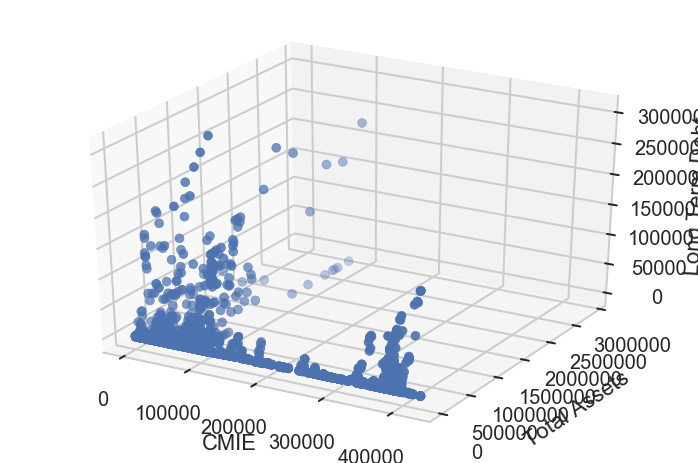

In [29]:
#Plotting Long term debt to total asset of firms
threed = plt.figure().gca(projection = '3d')
threed.scatter(df9.index, df9['total_asset'], df9['long_term_debt'])
threed.set_xlabel('CMIE')
threed.set_ylabel('Total Assets')
threed.set_zlabel('Long Term Debt')

plt.show()



In [ ]:
#not working
# fig = plt.figure()
# ax = Axes3D(fig)
# X = df3.index
# Y = df3['long_term_debt']
# X, Y = np.meshgrid(X, Y)
# Z = df3['short_term_debt']

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
# plt.show()

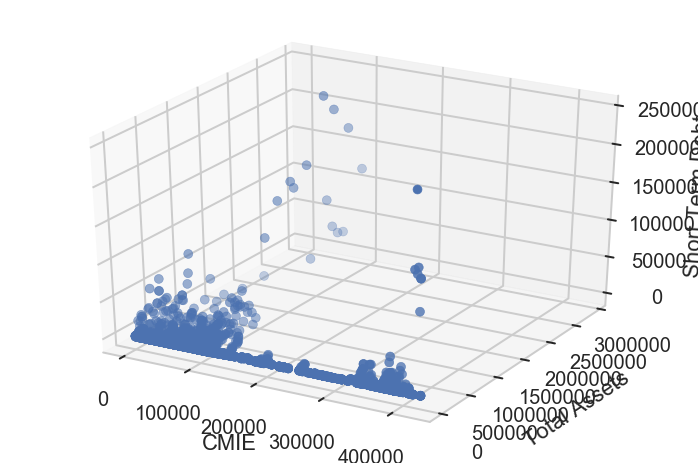

In [30]:
#plotting Short Term Debt to total assets of firms
threed = plt.figure().gca(projection = '3d')
threed.scatter(df9.index, df9['total_asset'], df9['short_term_debt'])
threed.set_xlabel('CMIE')
threed.set_ylabel('Total Assets')
threed.set_zlabel('Short Term Debt')

plt.show()

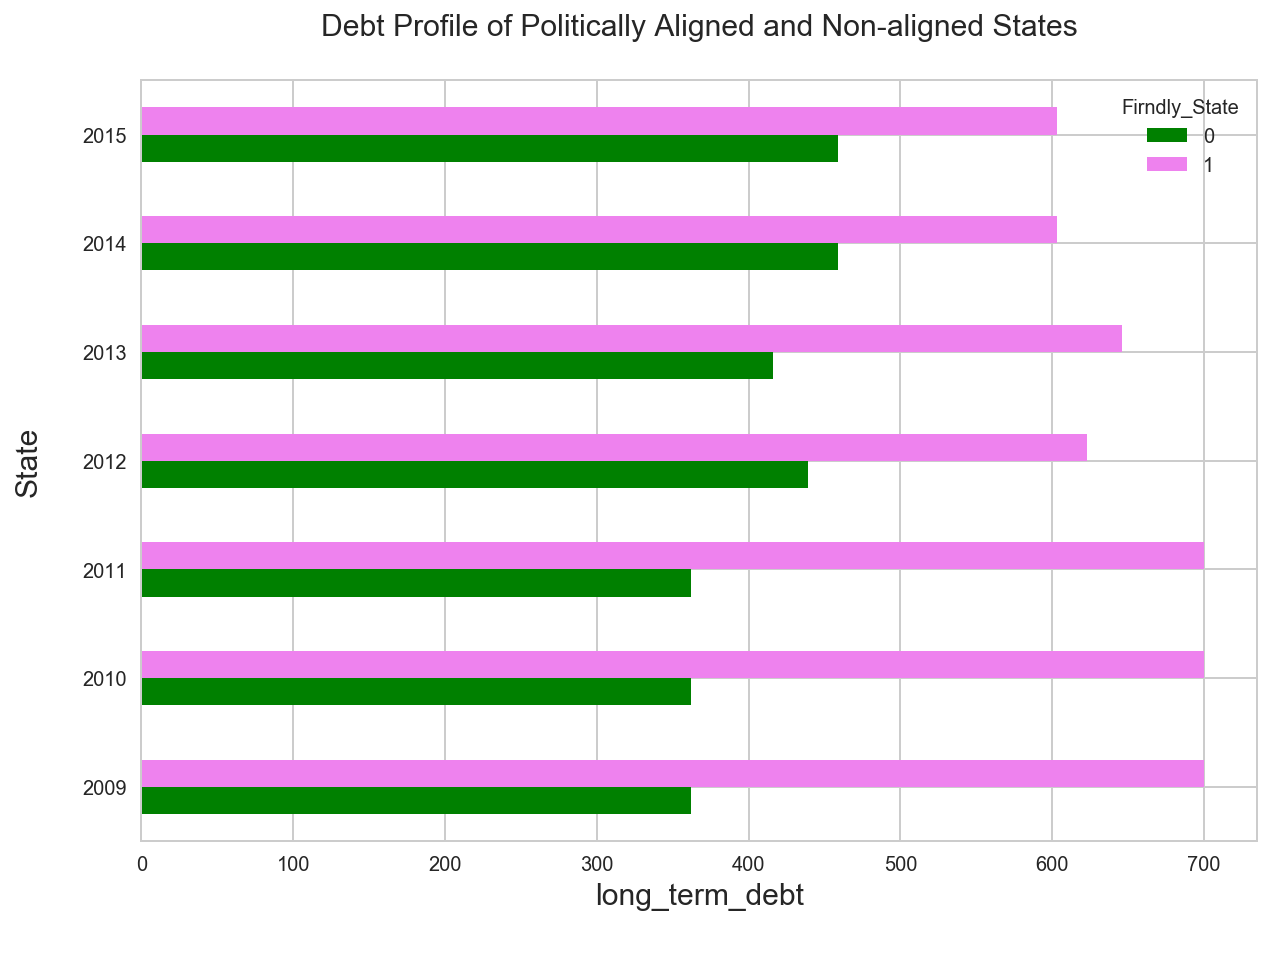

In [38]:
#Debt profile of firms in friendly and unfrindly states where Politically Aligned state is 1 and non-aligned 0
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df9.groupby(['year','Firndly_State']).size().unstack().plot( kind="barh", colors=['green', 'violet'], ax=ax)
plt.title('Debt Profile of Politically Aligned and Non-aligned States\n', fontsize = 15)
plt.ylabel('State\n', fontsize=15)
plt.xlabel('long_term_debt\n', fontsize=15)
plt.show()

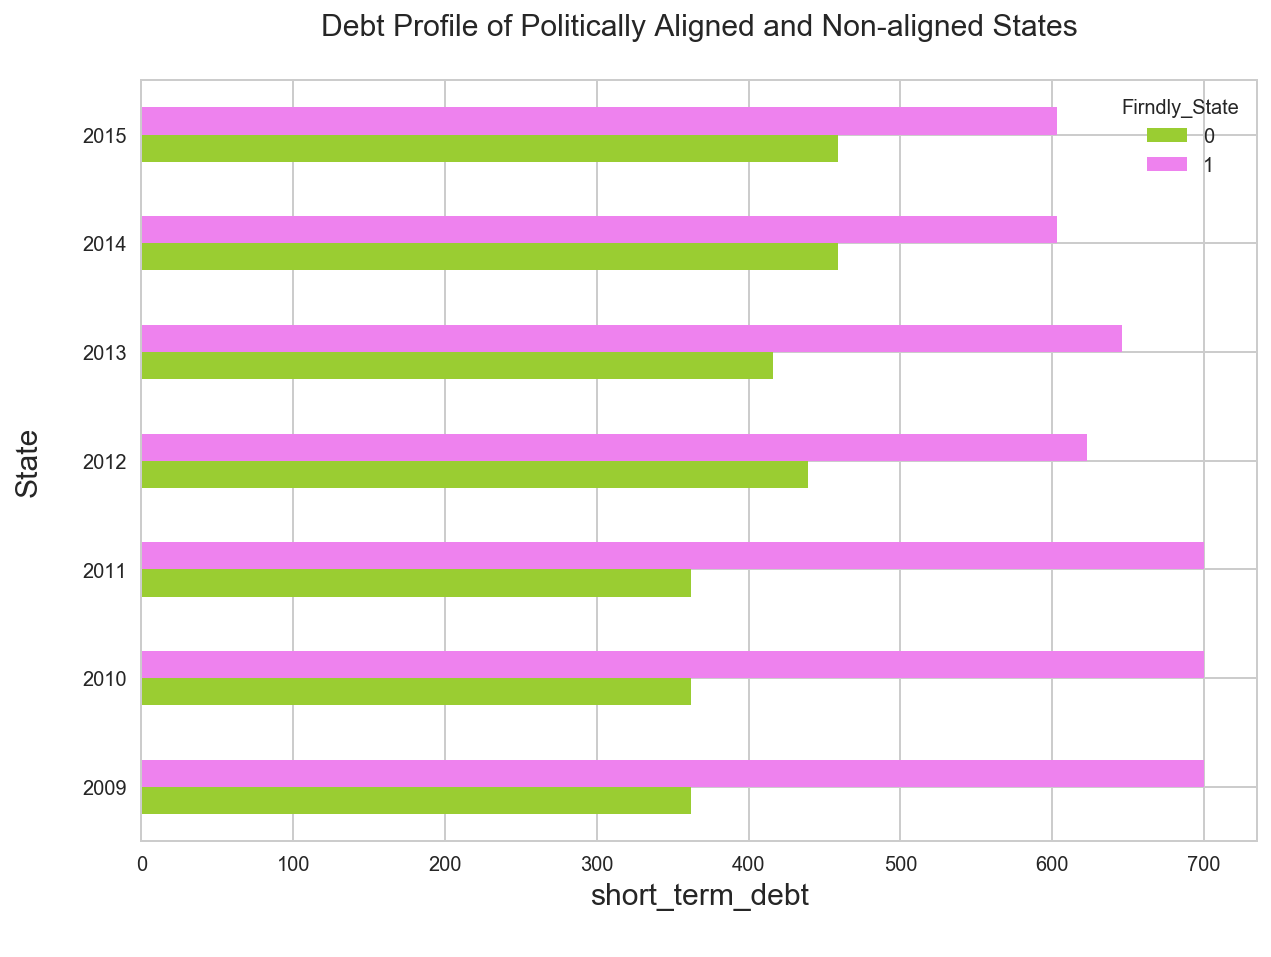

In [37]:
#Debt profile of firms in friendly and unfrindly states where Politically Aligned state is 1 and non-aligned 0
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df9.groupby(['year','Firndly_State']).size().unstack().plot( kind="barh", colors=['yellowgreen', 'violet'], ax=ax)
plt.title('Debt Profile of Politically Aligned and Non-aligned States\n', fontsize = 15)
plt.ylabel('State\n', fontsize=15)
plt.xlabel('short_term_debt\n', fontsize=15)
plt.show()

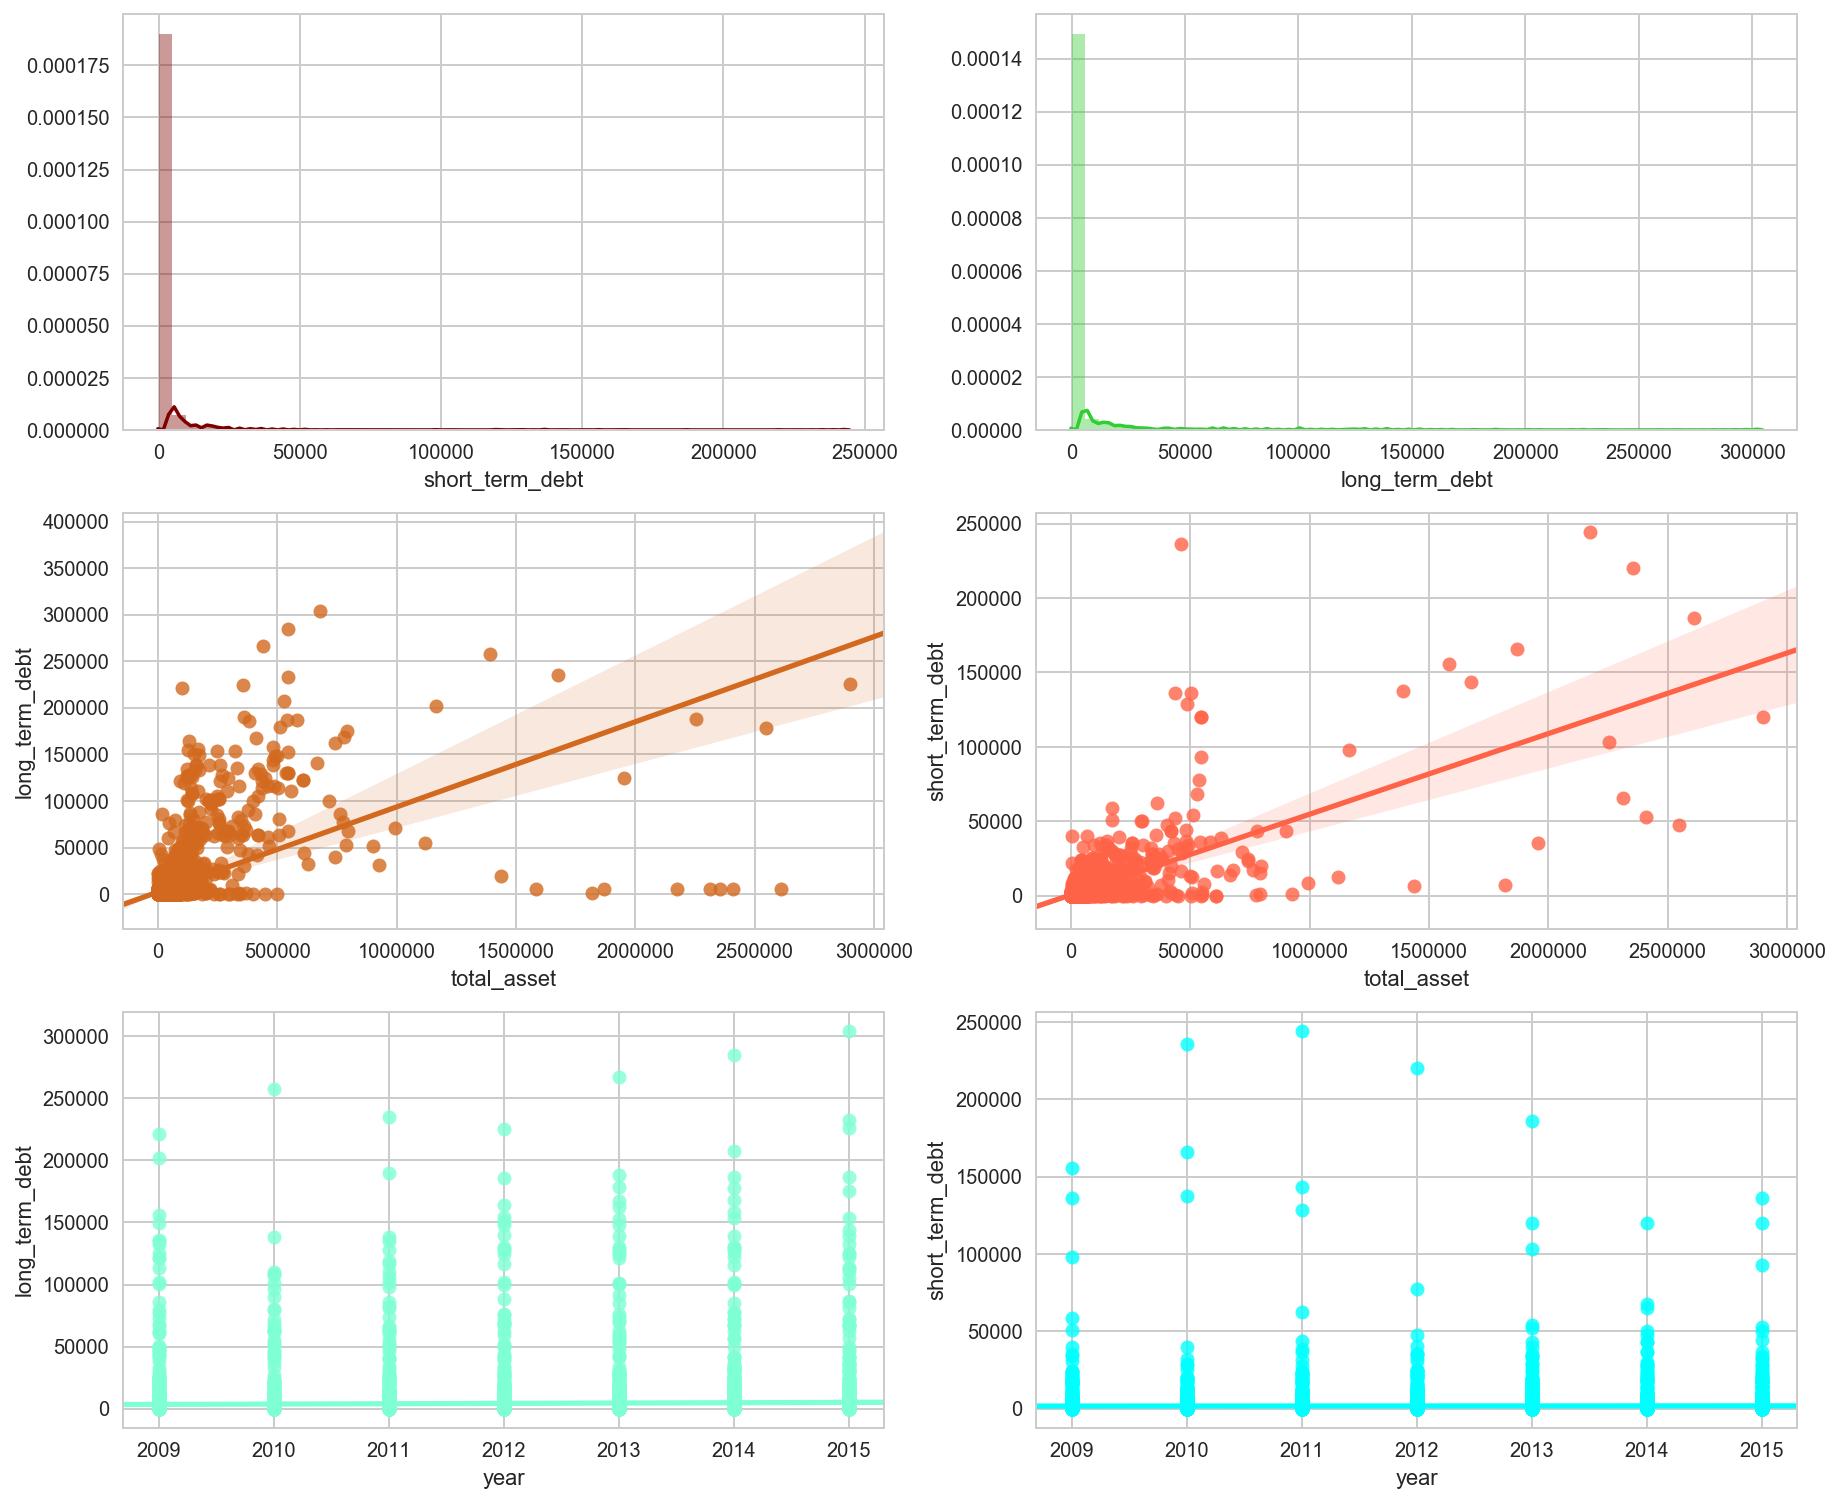

In [42]:
#Checking distribution of long term and short term debt with respect to total assets and over a period of time
fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(df9.short_term_debt ,ax=axarr[0,0], color='maroon')

axarr[0,1] = sns.distplot(df9.long_term_debt ,ax=axarr[0,1], color='limegreen')       
                          
axarr[1,0] = sns.regplot(df9.total_asset,
                       df9.long_term_debt, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(df9.total_asset,
                       df9.short_term_debt, ax=axarr[1,1], color='tomato')

axarr[2,0] = sns.regplot(df9.year,
                       df9.long_term_debt, ax=axarr[2,0], color='aquamarine')

axarr[2,1] = sns.regplot(df9.year,
                       df9.short_term_debt, ax=axarr[2,1], color='cyan')

plt.show()

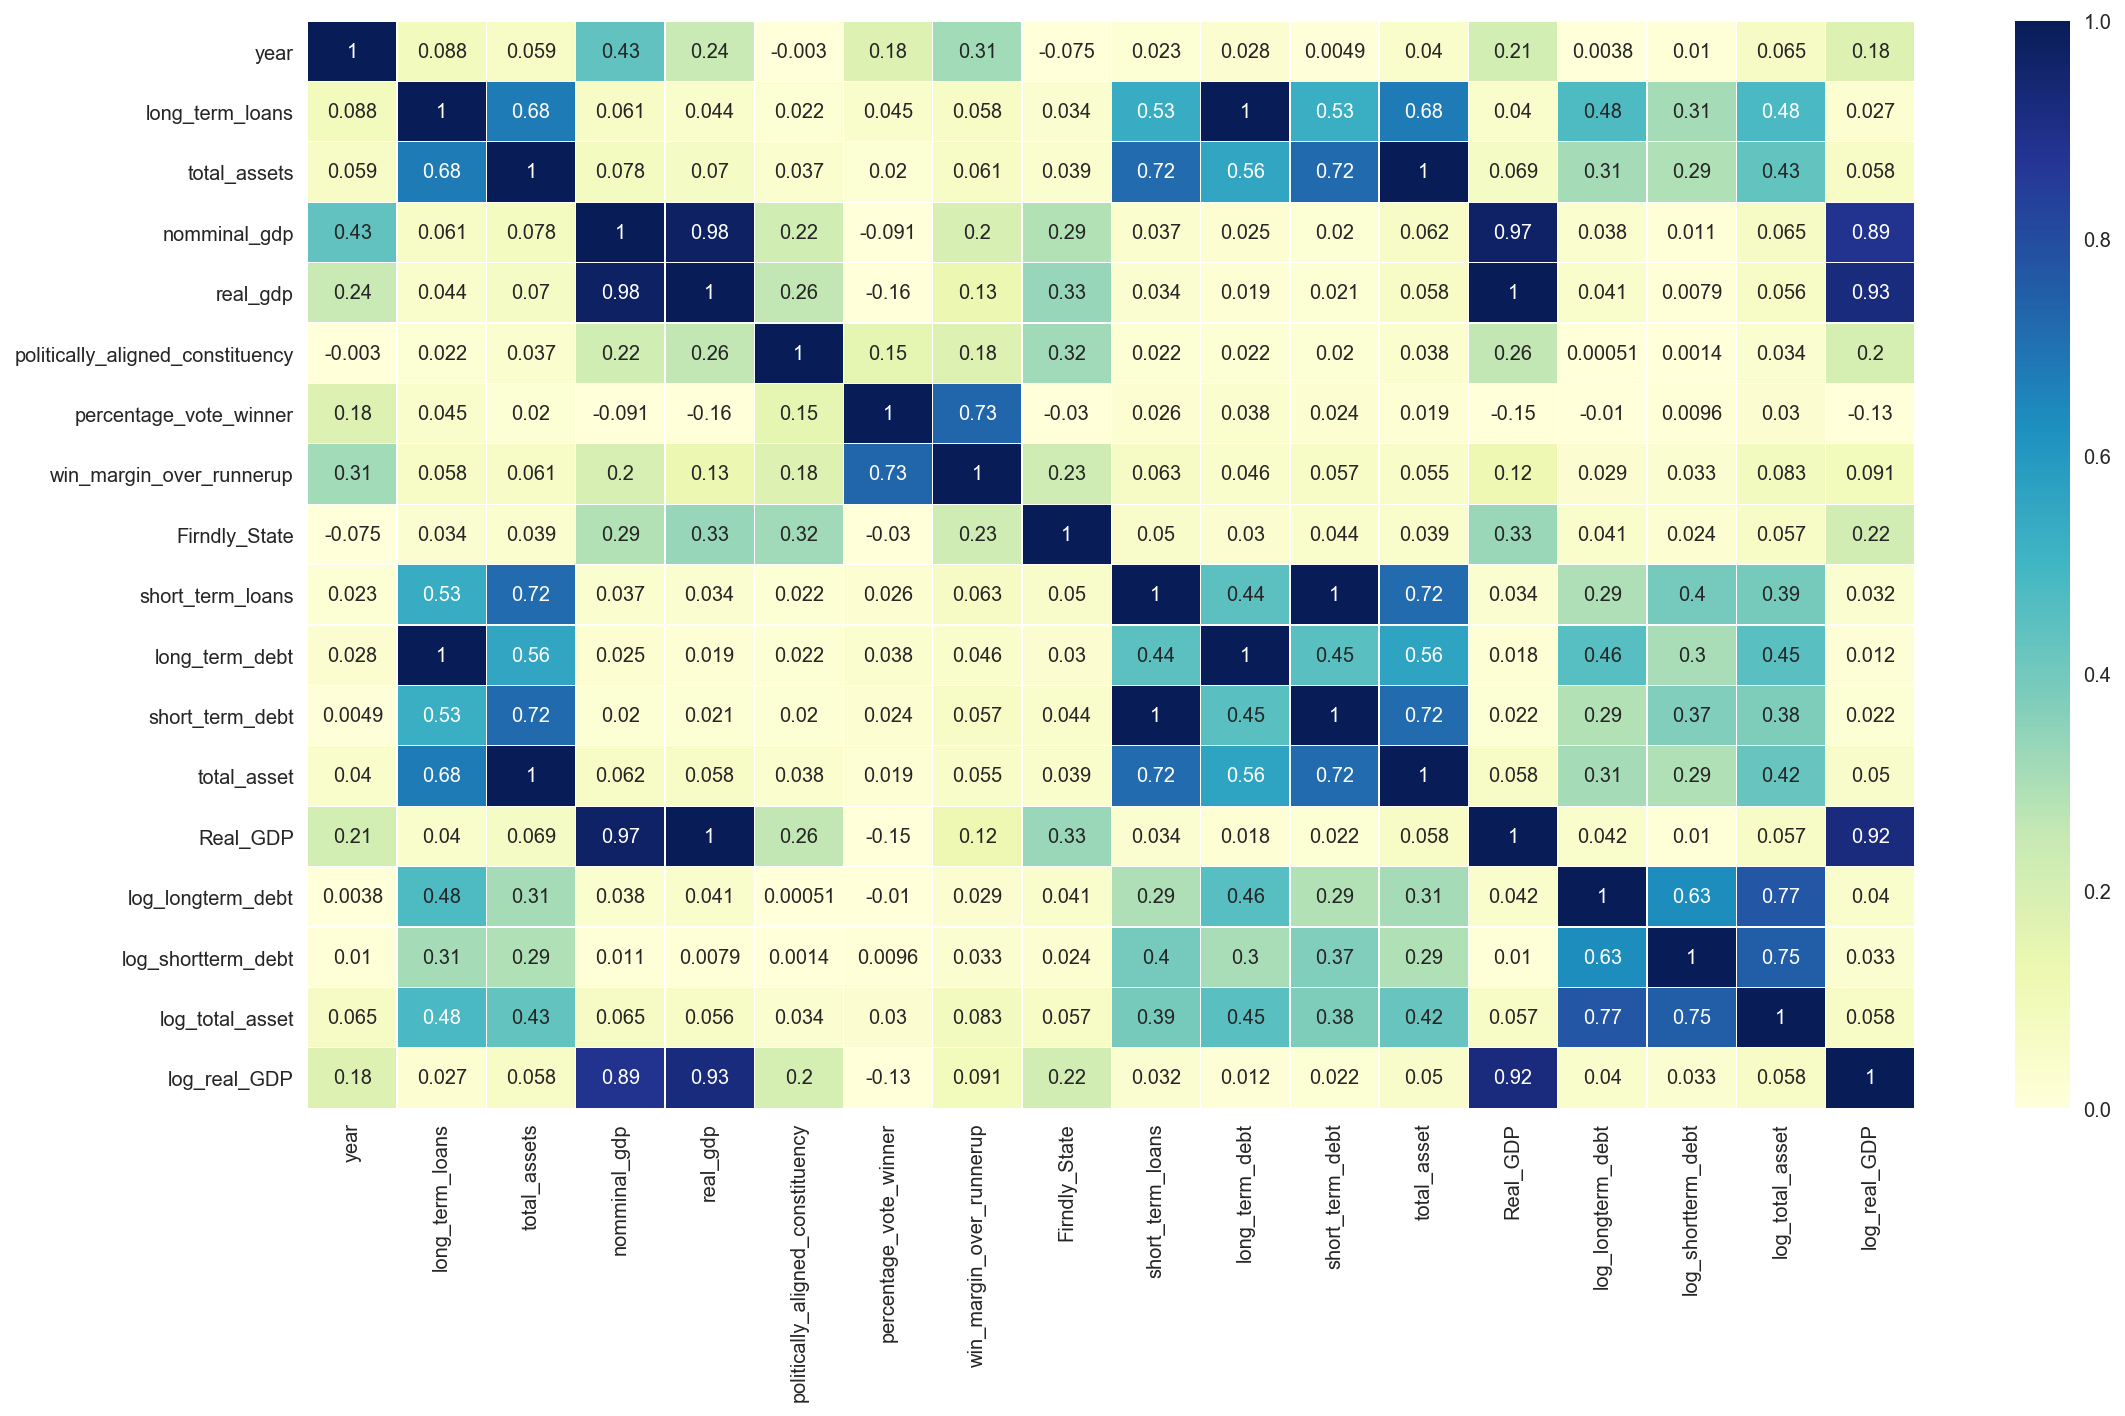

In [54]:
#Correlation matrix before diving into regressions 
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df9.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [61]:
#Regression - OLS - Effects of Political Scenario on Long Term Bollowings
import statsmodels.formula.api as smf
lm_lt = smf.ols(formula='long_term_debt ~ politically_aligned_constituency+ Firndly_State+ win_margin_over_runnerup+ total_asset+ Real_GDP', data=df9).fit()
print lm_lt.summary()

                            OLS Regression Results                            
Dep. Variable:         long_term_debt   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     680.2
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        12:55:46   Log-Likelihood:                -82323.
No. Observations:                7434   AIC:                         1.647e+05
Df Residuals:                    7428   BIC:                         1.647e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [58]:
#Regression - OLS - Effects of Political Scenario on Short term Borrowing
import statsmodels.formula.api as smf
lm_st = smf.ols(formula='short_term_debt ~ politically_aligned_constituency+ Firndly_State+ win_margin_over_runnerup+ total_asset+ Real_GDP', data=df9).fit()
print lm_st.summary()

                            OLS Regression Results                            
Dep. Variable:        short_term_debt   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1580.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        12:54:14   Log-Likelihood:                -75304.
No. Observations:                7434   AIC:                         1.506e+05
Df Residuals:                    7428   BIC:                         1.507e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

# Brief Report

For the purpose of this project I have used Firm level data from Indian companies for the period 2009 to 2015. The major variables of interest are long term and short term loans of firms. I propose to analyse the theory of politically motivated redistribution of resources. To do so, I have created two variables to capture the political alignment at both consituency and state level where an aligned constituency and state take the value of 1 else 0.
I did carryout visual inspection by plotting the main dependent variables using 3D and Histograms. The Scatter 3D plot for both long term and short term loans againts the asset size of firms shows a a rather skwewd concentration of observations. The Correlation matrix supports the underlying notion of theories of political budget cycles and politically motivated redistribution as all the variables capturing different aspects of political scenario are positively correlated with both long and short term loans though not significantly correlated.
OLS regression:
1. Long term Loans: 
The coefficients of political alignment and win margins of politicans are not statistically significant and have mixed signs.Since its a panel data analysis a better model would we that with fixed effects to account for region and year specific unobserved characteristics.
2. Short term loans: 
Both the coefficients for a politically aligned state and win margin shows that in the short term them have a more significant impact on borrowings.